In [18]:
### 1. Judul / Topik Project dan Identitas
# Judul: Klasifikasi Tingkat Produksi Padi di Sumatera Berdasarkan Faktor Iklim dengan Metode K-Nearest Neighbors (KNN)
# Nama: Achmad Akbar Riawan
# NIM: A11.2022.13959
# Mata Kuliah: Data Mining

### 2. Ringkasan dan Permasalahan project + Tujuan yang akan dicapai + Model / Alur Penyelesaian
# Ringkasan:
# Penelitian ini bertujuan untuk mengelompokkan tingkat produksi padi di Sumatera berdasarkan faktor-faktor iklim, seperti curah hujan, kelembapan, dan suhu rata-rata. Dengan menggunakan metode K-Nearest Neighbors (KNN), penelitian ini diharapkan dapat membantu petani dan pengambil kebijakan memaksimalkan hasil panen meskipun terjadi fluktuasi iklim

# Permasalahan:
# - Bagaimana kita dapat memanfaatkan faktor-faktor iklim untuk mengklasifikasikan tingkat produksi padi menggunakan metode K-Nearest Neighbors?
# - Apakah faktor-faktor iklim ini cukup akurat dalam mengelompokkan hasil panen padi?

# Tujuan:
# - Mengklasifikasikan tingkat produksi padi (rendah, sedang, tinggi) berdasarkan faktor-faktor iklim menggunakan metode K-Nearest Neighbors
# - Mengevaluasi akurasi dan kemampuan faktor-faktor iklim dalam mengelompokkan hasil panen padi secara efektif

# Alur Penyelesaian:
# 1. Pemahaman dataset
# 2. Pemrosesan data (pembersihan dan transformasi).
# 3. Pemodelan (menggunakan regresi atau algoritma lain yang sesuai).
# 4. Evaluasi model dan interpretasi hasil.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
# Load dataset
data = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')

In [8]:
# 3. Penjelasan Dataset, EDA dan Proses Features Dataset
# Penjelasan Dataset
print("\nPenjelasan Dataset:\n")
data.info()
print("\nStatistik Deskriptif:\n")
print(data.describe())


Penjelasan Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB

Statistik Deskriptif:

             Tahun      Produksi     Luas Panen  Curah hujan  Kelembapan  \
count   224.000000  2.240000e+02     224.000000   224.000000  224.000000   
mean   2006.500000  1.679701e+06  374349.966920  2452.490759   80.948705   
std       8.095838  1.161387e+06  232751.161987  1031.972625    4.878680   
min    1993.000000  4.293800e+04   63142.040000   222.500000   54.200000   
25

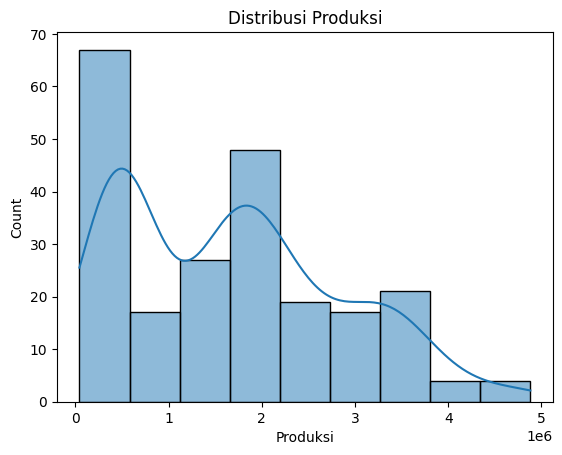

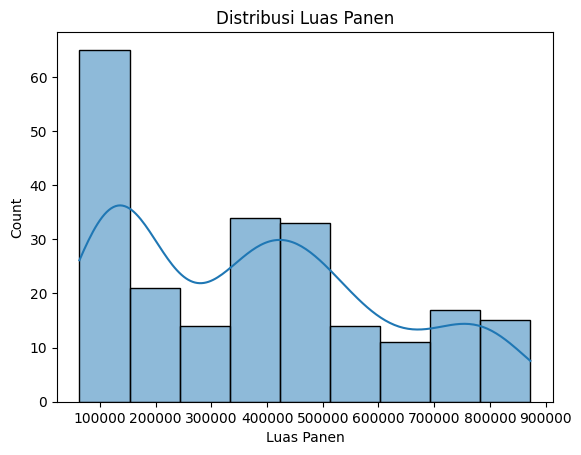

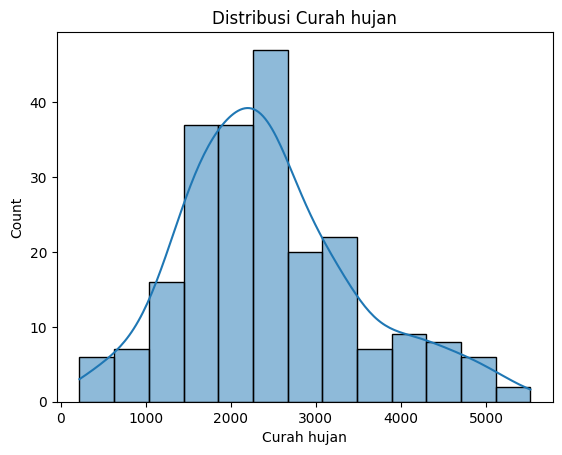

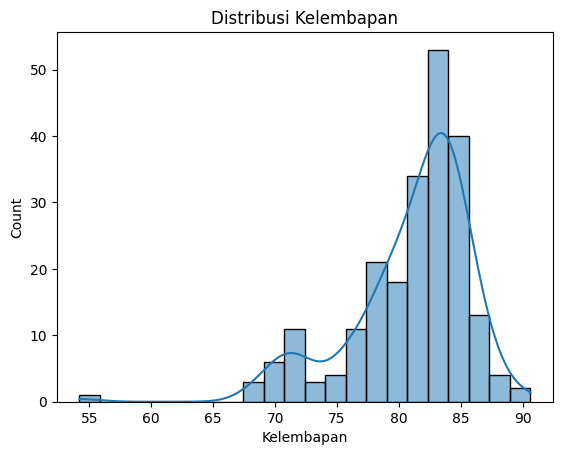

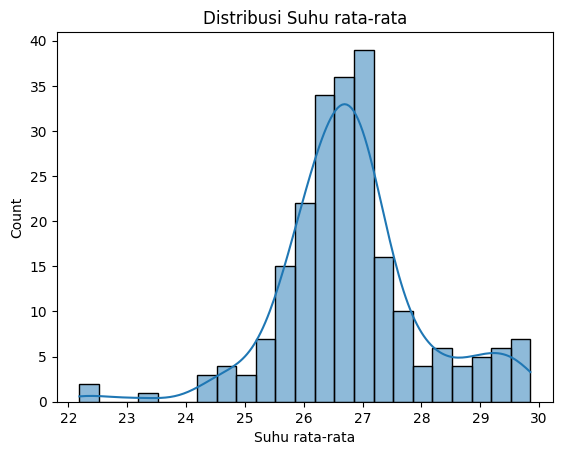

In [9]:
# EDA (Exploratory Data Analysis)
# Memvisualisasikan distribusi variabel numerik
numerical_features = ['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']
for feature in numerical_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.show()

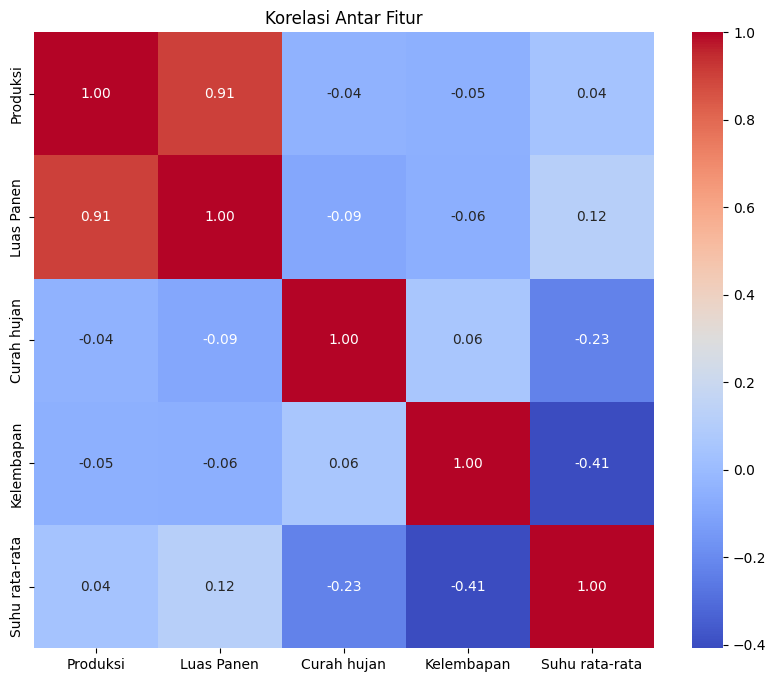

In [10]:
# Memeriksa korelasi antar fitur numerik
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()


Distribusi Target (Produksi):



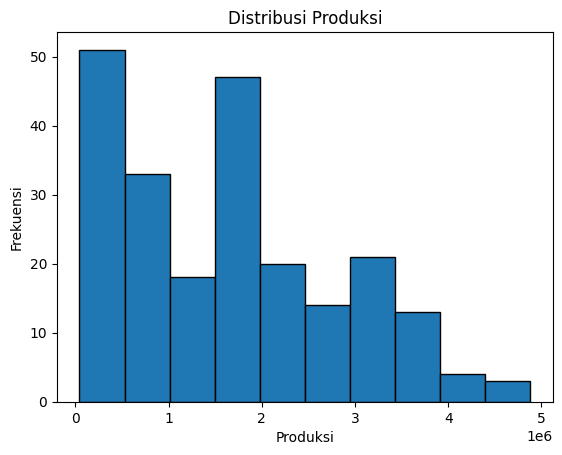

In [11]:
# Memeriksa distribusi target (Produksi)
print("\nDistribusi Target (Produksi):\n")
plt.hist(data['Produksi'], bins=10, edgecolor='k')
plt.title('Distribusi Produksi')
plt.xlabel('Produksi')
plt.ylabel('Frekuensi')
plt.show()

In [12]:
# Proses Features Dataset
# Mengelompokkan produksi menjadi kategori (misalnya rendah, sedang, tinggi)
def categorize_production(value):
    if value < data['Produksi'].quantile(0.33):
        return 'Rendah'
    elif value < data['Produksi'].quantile(0.66):
        return 'Sedang'
    else:
        return 'Tinggi'

data['Kategori Produksi'] = data['Produksi'].apply(categorize_production)

In [13]:
# Memisahkan fitur dan target
X = data[['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
y = data['Kategori Produksi']

In [14]:
# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# 4. Proses Learning / Modeling
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Membuat model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()


Confusion Matrix:

[[13  3  0]
 [ 3 12  3]
 [ 1  2  8]]


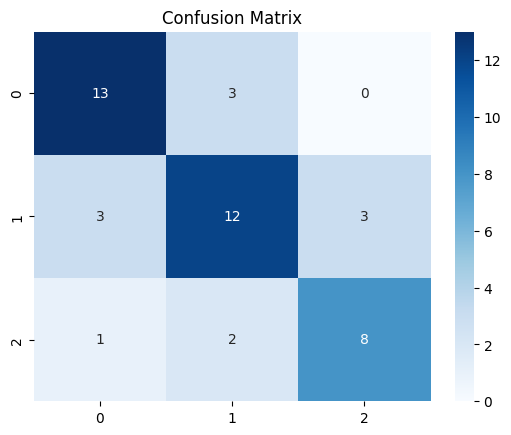


Classification Report:

              precision    recall  f1-score   support

      Rendah       0.76      0.81      0.79        16
      Sedang       0.71      0.67      0.69        18
      Tinggi       0.73      0.73      0.73        11

    accuracy                           0.73        45
   macro avg       0.73      0.74      0.73        45
weighted avg       0.73      0.73      0.73        45


Accuracy: 0.73


In [16]:
# 5. Performa Model
# Evaluasi model
y_pred = knn.predict(X_test)

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

In [20]:
print("\nDiskusi Hasil dan Kesimpulan:\n")
print(f"Model KNN dengan n_neighbors=5 menghasilkan akurasi sebesar {accuracy:.2f}.")
print("Hasil ini menunjukkan bahwa faktor-faktor iklim memiliki kontribusi terhadap pengelompokan tingkat produksi padi.")
print("Namun, dengan akurasi sebesar 73%, performa model masih dapat ditingkatkan. Analisis tambahan diperlukan, termasuk:")
print("- Mengevaluasi pentingnya masing-masing fitur.")
print("- Memasukkan variabel lain yang relevan dengan produksi padi, seperti kualitas tanah atau jenis padi.")
print("- Mengeksplorasi model yang lebih kompleks atau parameter yang lebih optimal.")



Diskusi Hasil dan Kesimpulan:

Model KNN dengan n_neighbors=5 menghasilkan akurasi sebesar 0.73.
Hasil ini menunjukkan bahwa faktor-faktor iklim memiliki kontribusi terhadap pengelompokan tingkat produksi padi.
Namun, dengan akurasi sebesar 73%, performa model masih dapat ditingkatkan. Analisis tambahan diperlukan, termasuk:
- Mengevaluasi pentingnya masing-masing fitur.
- Memasukkan variabel lain yang relevan dengan produksi padi, seperti kualitas tanah atau jenis padi.
- Mengeksplorasi model yang lebih kompleks atau parameter yang lebih optimal.
